<a href="https://colab.research.google.com/github/pradeepfckumar/Amazon-Stock-Data---Mini-Project/blob/main/Amazon_Stock_Data_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Google Colab notebook serves as a mini-project for analyzing Amazon stock data. It covers several key aspects of stock market analysis:

Data Import and Cleaning: Loads Amazon stock data from a CSV file and performs initial data inspection and cleaning, including checking for null values and duplicates.
Price and Volume Analysis: Calculates and visualizes the daily percentage change in Amazon's closing price and the stock's trading volume.
Moving Average: Computes and plots the 100-day moving average of the closing price to identify trends.
Daily Returns and Trend: Calculates the daily percentage return based on the adjusted close price and derives a 'Trend' column from it.
Correlation Analysis: Determines the correlation between different financial metrics within the Amazon stock data.

In [ ]:
# Import the data of various stocks from Yahoo finance website and perform cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Amazon = pd.read_csv('/content/Amazon Data.csv')
Amazon.head()
Amazon.tail()
Amazon.describe()
Amazon.size
Amazon.shape
Amazon.columns
Amazon.dtypes
Amazon.isnull().any()
Amazon.isnull().sum()
Amazon.duplicated().sum()
Amazon.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

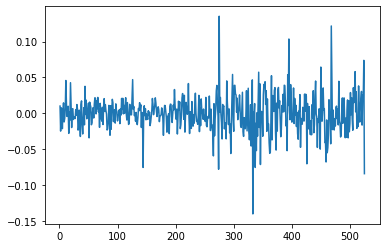

In [ ]:
#Change in Amazon stock price

Changed_price =(Amazon['Close']/Amazon['Close'].shift(1))-1
Changed_price
plt.plot(Changed_price)

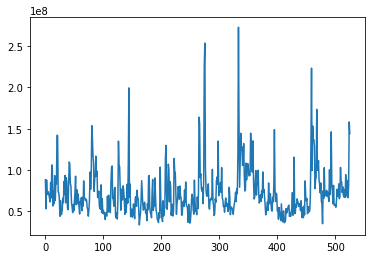

In [ ]:
#Visualising the change in stock's volume

plt.plot(Amazon['Volume'])

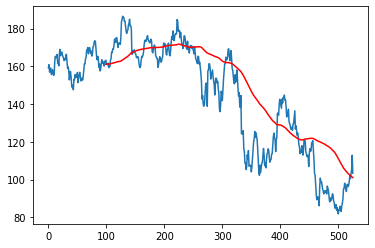

In [ ]:
#Moving Average is the average of particular time frame.

Moving_Average = Amazon.Close.rolling(100).mean()
Moving_Average

plt.plot(Amazon.Close)
plt.plot(Moving_Average,'r')

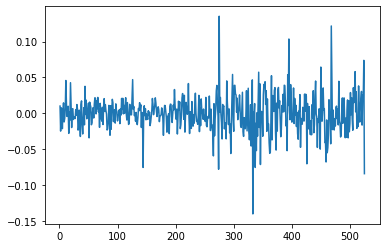

In [ ]:
##Daily Return Average of Amazon stock

Amazon_Daily_Return = Amazon['Adj Close'].pct_change()
Amazon_Daily_Return
plt.plot(Amazon_Daily_Return)

In [ ]:
# Add a new column ‘Trend’ whose values are based on the 'Daily Return'

Trend = Amazon_Daily_Return
Amazon['Trend'] = Trend
Amazon
Amazon.Trend.isnull().any()
Amazon.Trend.fillna(0, inplace = True)
Amazon

,Date,Open,High,Low,Close,Adj Close,Volume,Trend
0,04-01-2021,163.500000,163.600006,157.201004,159.331497,159.331497,88228000,0.000000
1,05-01-2021,158.300507,161.169006,158.253006,160.925507,160.925507,53110000,0.010004
2,06-01-2021,157.324005,159.875504,156.557999,156.919006,156.919006,87896000,-0.024897
3,07-01-2021,157.850006,160.427002,157.750000,158.108002,158.108002,70290000,0.007577
4,08-01-2021,159.000000,159.531998,157.110001,159.134995,159.134995,70754000,0.006496
...,...,...,...,...,...,...,...,...
521,30-01-2023,101.089996,101.739998,99.010002,100.550003,100.550003,70691900,-0.016530
522,31-01-2023,101.160004,103.349998,101.139999,103.129997,103.129997,66527300,0.025659
523,01-02-2023,102.529999,106.239998,101.239998,105.150002,105.150002,80450100,0.019587
524,02-02-2023,110.250000,114.000000,108.879997,112.910004,112.910004,158154200,0.073799


In [ ]:
#Visualize trend frequency through a Pie Chart

plot = Amazon.Trend.plot.pie
plt.show()

In [ ]:
# What was the correlation between the daily returns of Amazon stocks

corr_data = Amazon.corr(method = 'pearson')
corr_data.head()
corr_data.isnull().any()
corr_data.fillna(0, inplace = True)
corr_data
